<a href="https://colab.research.google.com/github/RAHUL-B-PILLAI/coursework_heart_disease_pridiction/blob/main/ann_and_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear classifier(Perceptron)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [1]:
from google.colab import files
upload= files.upload()

Saving heart.csv to heart.csv


In [3]:
# Using pands to read csv file
data=pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# preprocessing the dataset  
from sklearn import preprocessing
label= preprocessing.LabelEncoder()
data1=data.copy()
for i in data.columns[data1.dtypes=='object']:
  data1[i]=label.fit_transform(data[i])
data1.tail(7)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
911,59,1,0,164,176,1,0,90,0,1.0,1,1
912,57,0,0,140,241,0,1,123,1,0.2,1,1
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1
917,38,1,2,138,175,0,1,173,0,0.0,2,0


In [5]:
X,Y=data1.iloc[:,:-1].values,data1.iloc[:,-1].values

In [6]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [7]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.80,random_state=45)

In [9]:
from sklearn.linear_model import Perceptron

In [19]:
lcp = Perceptron(eta0=0.1)
lcp.fit(x_train,y_train)

Perceptron(eta0=0.1)

In [20]:
ytrain_pred=lcp.predict(x_train)
accuracy_score(ytrain_pred,y_train)

0.5694822888283378

Text(0.5, 1.0, 'Linear Classifier  ROC Curve')

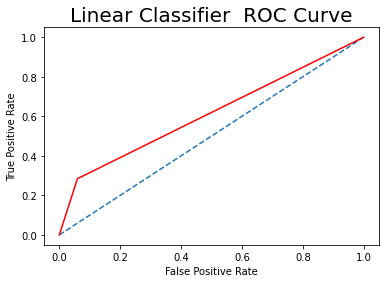

In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


auc=roc_auc_score(y_train,ytrain_pred)
fpr,tpr,threshold=roc_curve(y_train,ytrain_pred)
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,color="red")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Linear Classifier  ROC Curve', size =20)

In [22]:
ytest_pred=lcp.predict(x_test)
accuracy_score(ytest_pred,y_test)

0.592391304347826

Text(0.5, 1.0, 'Linear Classifier  ROC Curve')

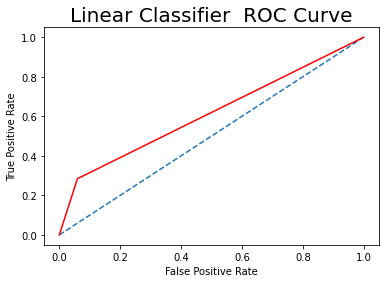

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


auc=roc_auc_score(y_train,ytrain_pred)
fpr,tpr,threshold=roc_curve(y_train,ytrain_pred)
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,color="red")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Linear Classifier  ROC Curve', size =20)

Linear classifer (Logistic Regression)

In [37]:
from sklearn.linear_model import LogisticRegression

# fit a model
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(x_train,y_train)
# predict probabilities


LogisticRegression(max_iter=1000)

In [38]:
ytrain_pred=lr.predict(x_train)
accuracy_score(ytrain_pred,y_train)

0.8528610354223434

In [39]:
ytest_pred=lr.predict(x_test)
accuracy_score(ytest_pred,y_test)

0.842391304347826

Neural Network

In [41]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [59]:
# build a model
model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) # Add an input shape! (features,)
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary() 

# compile the model
model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model.fit(x_train,
                    y_train,
                    callbacks=[es],
                    epochs=80, # you can set this to a big number!
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                192       
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
59/59 [==============================] - 1s 4ms/step - loss: 3.6139 - accuracy: 0.4957 - val_loss: 1.2388 - val_accuracy: 0.6531
Epoch 2/80
59/59 [==============================] - 0s 2ms/step - loss: 1.2164 - accuracy: 0.6627 - val_loss: 1.0543 - val_accuracy: 0.6735
Epoch 3/80
59/59 [======================

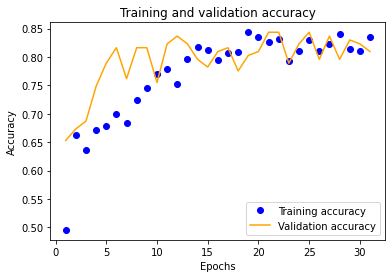

0.8435373902320862

In [60]:
# Learning curve(accuracy)
# let's see the training and validation accuracy by epoch

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# this is the max value - should correspond to
# the HIGHEST train accuracy
np.max(val_acc)

In [61]:
from sklearn.metrics import classification_report
preds = np.round(model.predict(X),0)

print(classification_report(Y, preds))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       410
           1       0.89      0.81      0.85       508

    accuracy                           0.84       918
   macro avg       0.84      0.84      0.84       918
weighted avg       0.85      0.84      0.84       918



In [65]:
# build a model
model = Sequential()
model.add(Dense(50, input_shape=(X.shape[1],), activation='relu')) # Add an input shape! (features,)
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary() 

# compile the model
model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model.fit(x_train,
                    y_train,
                    callbacks=[es],
                    epochs=80, # you can set this to a big number!
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 50)                600       
                                                                 
 dense_14 (Dense)            (None, 50)                2550      
                                                                 
 dense_15 (Dense)            (None, 50)                2550      
                                                                 
 dense_16 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5,751
Trainable params: 5,751
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
59/59 [==============================] - 1s 5ms/step - loss: 1.0795 - accuracy: 0.6167 - val_loss: 0.6554 - val_accuracy: 0.7075
Epoch 2/80
59/59 [==========================

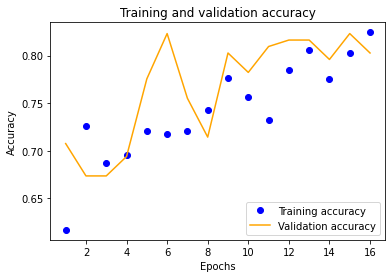

0.8231292366981506

In [66]:
# Learning curve(accuracy)
# let's see the training and validation accuracy by epoch

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# this is the max value - should correspond to
# the HIGHEST train accuracy
np.max(val_acc)

In [67]:
from sklearn.metrics import classification_report
preds = np.round(model.predict(X),0)

print(classification_report(Y, preds))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       410
           1       0.82      0.81      0.81       508

    accuracy                           0.80       918
   macro avg       0.79      0.80      0.79       918
weighted avg       0.80      0.80      0.80       918

